In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

In [12]:
datadir = "kagglecatsanddogs_3367a/PetImages"
categories = ['Dog', 'Cat']

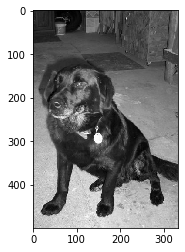

In [23]:
#Step 0 : We want to prepare our pictures, here is how
for category in categories : 
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = plt.cm.gray)
        plt.show()
        break
    break
    

In [24]:
 print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


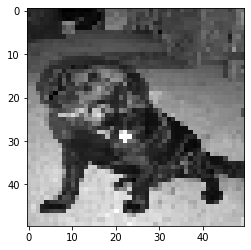

In [25]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = plt.cm.gray)
plt.show()

In [18]:
#Step 1 : Loading the pictures and resize them
training_data = []
img_size = 50

def create_training_data():
    for category in categories : 
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        print(category)
        
        for img in tqdm(os.listdir(path)):
            try : 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_training_data()

#Step 2 : Same as before except for the reshaping (for visualisation)
training_data_2 = []

def create_training_data_2():
    for category in categories : 
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        print(category)
        
        for img in tqdm(os.listdir(path)):
            try : 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                training_data_2.append([img_array, class_num])
            except Exception as e:
                pass
            
            
create_training_data_2()

Dog



Cat



Dog



Cat


In [19]:
img_visu = np.asarray(training_data_2)
img_train, img_test = train_test_split(img_visu, train_size = 0.8, random_state = 42)

#Saving the pictures for visualisation
np.save('img_test', img_test)

In [20]:
#Step 3 : Splitting the features and the labels and saving them
X = []
y = []

for features, label in training_data : 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size)
y = np.asarray(y)

np.save('features.npy', X)
np.save('labels.npy', y)